# project-2 Mushroom Data Analysis

# Problem statement -

## Data Set Information:

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

Thus, in this project, you have to predict the "Class" column.

In [56]:
# Lets  start with importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, 


import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 


import warnings
warnings.filterwarnings('ignore')

# Examine Data

In [57]:
# Import the data as a pandas DataFrame & check 10 data set
data =pd.read_csv("mushrooms.csv") 
data.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [58]:
#print summary (number of obseravation and data type for each column in give data set)
print('Shape         ------>',data.shape)
print('Each column and data type and its count','\n')
print(data.info())

Shape         ------> (8124, 23)
Each column and data type and its count 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  sta

In [59]:
# check null value in our dataset 
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Seems on other cols have nulls. its safe to proced 

In [60]:
# Check duplicate value in given datset 
data.duplicated().sum()

0

there is no duplicate in data set so good to proceed

In [61]:
#dataframe statistics for each colimn in given datset 
#(mean, minimum and maximum value for each column containing numerical data)
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


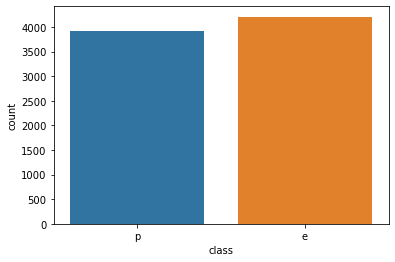

In [63]:
#plot each class frequency 

sns.countplot(x='class',data=data)
plt.show()

Dataset is not imbalanced , we are good to proceed 

# Manipulating Data

We should have a class column as 1 or 0. So we can use below code to change "p" string to 1 and "e" to 0. Also I will get rid of "veil-type" column.

In [62]:
# DROP ALERT vail -type column
data = data.drop(['veil-type'],axis=1)

In [64]:
# replace label column (class) into binary codes
# machine Model never ever understand object data type 

data['class']= data['class'].replace({'p':1,'e':0})

Now we will change feature column's values to floats ,Now I will explain how did I manipulate feature datas with one example feature:

All features values should be between 0 and 1. This is the first point.

For example, take "ring_number" column. This column has three unique values which are "n", "o" and "t". We can assign 1 and 0 to two of them, and the other one should be between of them. Let's say n = 1, o = 0 and t = 0.5.

Another example is "cap_surface". This column has four unique values, this values don't matter. We can assing 1 and 0 to two of them again, but other two variable? Now we will say them 0.33 and 0.67.


let convert feature data into numerical data

In [65]:
#using for loop convert cat. data into float data
for column in data.drop(["class"], axis=1).columns:
    value = 0
    step = 1/(len(data[column].unique())-1)
    for i in data[column].unique():
        data[column] = [value if letter == i else letter for letter in data[column]]
        value += step

In [66]:
# Check top 10 data set after converting into numerical data set 
data.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,0.0,0.000000,0.000000,0.0,0.000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.000000
1,0,0.0,0.000000,0.111111,0.0,0.125,0.0,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.125,0.2,0.166667
2,0,0.2,0.000000,0.222222,0.0,0.250,0.0,0.0,1.0,0.090909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.125,0.2,0.333333
3,1,0.0,0.333333,0.222222,0.0,0.000,0.0,0.0,0.0,0.090909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.000000
4,0,0.0,0.000000,0.333333,1.0,0.375,0.0,1.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.125,0.4,0.166667
5,0,0.0,0.333333,0.111111,0.0,0.125,0.0,0.0,1.0,0.090909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.2,0.166667
6,0,0.2,0.000000,0.222222,0.0,0.125,0.0,0.0,1.0,0.181818,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.2,0.333333
7,0,0.2,0.333333,0.222222,0.0,0.250,0.0,0.0,1.0,0.090909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.125,0.0,0.333333
8,1,0.0,0.333333,0.222222,0.0,0.000,0.0,0.0,0.0,0.272727,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.6,0.166667
9,0,0.2,0.000000,0.111111,0.0,0.125,0.0,0.0,1.0,0.181818,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.333333


In [67]:
# Check bottom 10 data set after converting into numerical data set 
data.tail(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8114,1,0.6,0.333333,0.888889,1.0,1.000,1.0,0.0,1.0,0.909091,...,0.666667,0.666667,0.875,1.000,0.000000,1.0,1.00,0.50,1.0,0.5
8115,0,0.0,0.000000,0.000000,1.0,0.375,1.0,0.0,1.0,0.909091,...,0.000000,0.000000,0.750,0.875,0.666667,0.0,0.00,0.75,0.6,1.0
8116,1,0.8,0.333333,0.000000,1.0,0.875,0.0,0.0,0.0,0.727273,...,0.000000,1.000000,0.250,0.000,0.000000,0.0,0.25,0.50,0.6,1.0
8117,1,0.8,0.000000,0.444444,1.0,0.750,0.0,0.0,0.0,0.727273,...,0.666667,0.000000,0.250,0.000,0.000000,0.0,0.25,0.50,0.6,0.5
8118,1,0.8,0.333333,0.000000,1.0,0.500,0.0,0.0,0.0,0.727273,...,0.666667,0.000000,0.250,0.000,0.000000,0.0,0.25,0.50,0.6,0.5
8119,0,0.8,0.000000,0.000000,1.0,0.375,1.0,0.0,1.0,0.909091,...,0.000000,0.000000,0.750,0.875,0.666667,0.0,0.00,1.00,1.0,1.0
8120,0,0.0,0.000000,0.000000,1.0,0.375,1.0,0.0,1.0,0.909091,...,0.000000,0.000000,0.750,0.875,0.333333,0.0,0.00,1.00,0.6,1.0
8121,0,0.6,0.000000,0.000000,1.0,0.375,1.0,0.0,1.0,0.090909,...,0.000000,0.000000,0.750,0.875,0.666667,0.0,0.00,1.00,1.0,1.0
8122,1,0.8,0.333333,0.000000,1.0,0.750,0.0,0.0,0.0,0.727273,...,0.000000,1.000000,0.000,0.000,0.000000,0.0,0.25,0.50,0.6,1.0
8123,0,0.0,0.000000,0.000000,1.0,0.375,1.0,0.0,1.0,0.909091,...,0.000000,0.000000,0.750,0.875,0.666667,0.0,0.00,0.75,1.0,1.0


In [68]:
#print summary (number of obseravation and data type for each column in give data set)
print('Shape         ------>',data.shape)
print('Each column and data type and its count','\n')
print(data.info())

Shape         ------> (8124, 22)
Each column and data type and its count 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   class                     8124 non-null   int64  
 1   cap-shape                 8124 non-null   float64
 2   cap-surface               8124 non-null   float64
 3   cap-color                 8124 non-null   float64
 4   bruises                   8124 non-null   float64
 5   odor                      8124 non-null   float64
 6   gill-attachment           8124 non-null   float64
 7   gill-spacing              8124 non-null   float64
 8   gill-size                 8124 non-null   float64
 9   gill-color                8124 non-null   float64
 10  stalk-shape               8124 non-null   float64
 11  stalk-root                8124 non-null   float64
 12  stalk-surface-above-ring  8124 non-null   f

# Plotting Heatmap (correlation matrix )

1. lets try to see if we can reduce the feature using different techniques
2. lets plot heatmap to visualize and find the coeffcient of multicollinarity

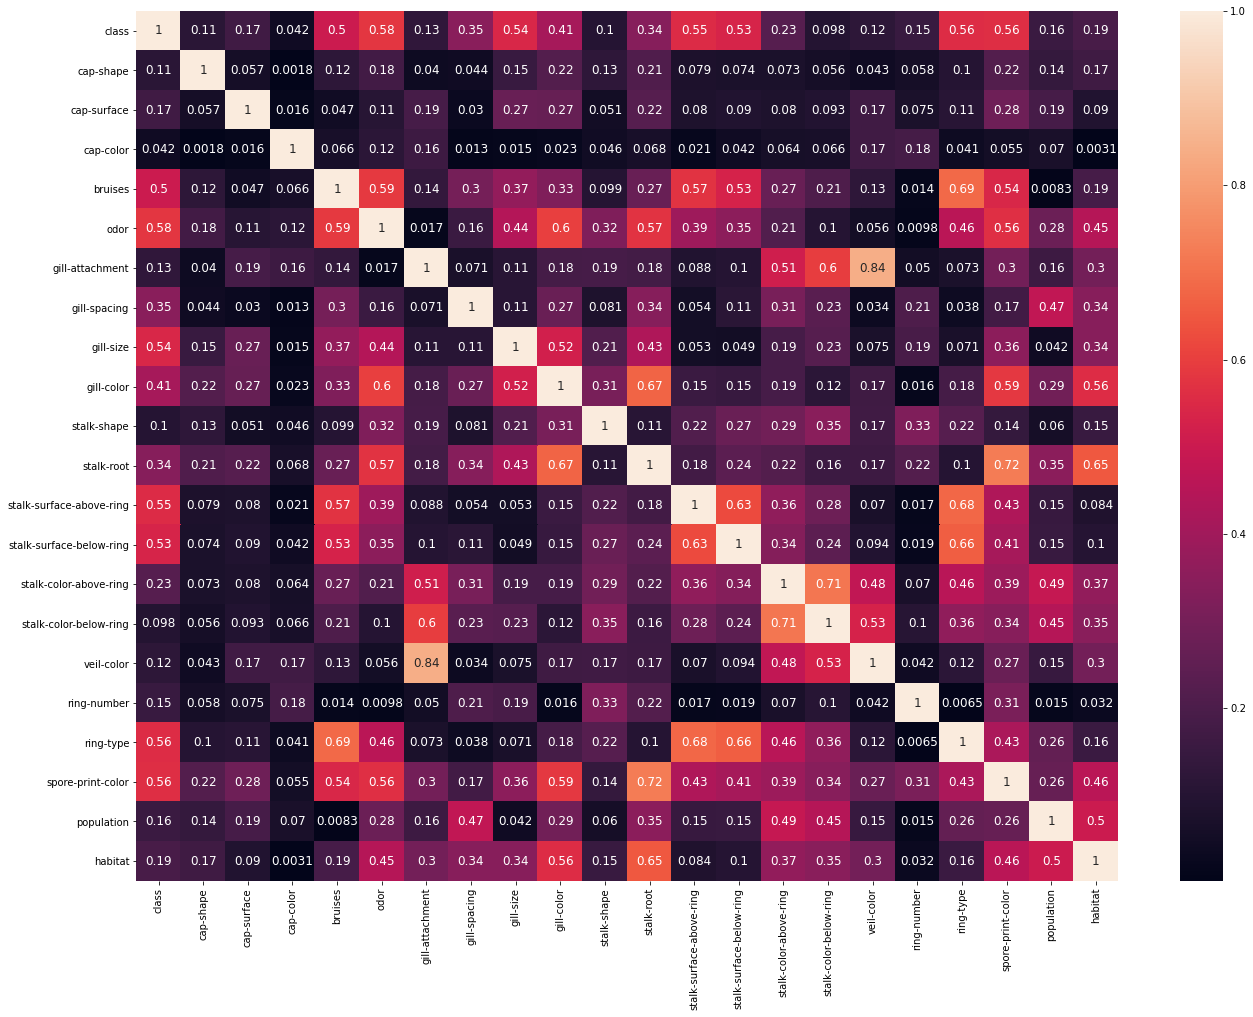

In [69]:
df_corr = data.corr().abs() #Corr method  =co-realation co-efficient ,# abs =Absolute nuumer 

# this code will get the coefficient of one variable vs all other variable (relationship)
# annot= true (used to display number) 
#aanot_KWs =size of number 

plt.figure(figsize=(22,16))
sns.heatmap(df_corr,annot=True,annot_kws={'size':12}) 
plt.show()


# The value lies between -1 to 1 (-1 Negatively correlation ) & (+1 Positively correlation )

# Preparing Data for Machine Learning

Now we will choose x and y axis and split these datas to train or test.

In [102]:
# Divide data set into features and label

X= data.drop(['class'],axis=1)

y=data['class']

In [84]:
# Checking label data set 
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

In [85]:
# checking Features data set 
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.00,0.000,0.000000,0.0,0.00,0.000,0.0,0.000000
1,0.0,0.000000,0.111111,0.0,0.125,0.0,0.0,1.0,0.000000,0.0,...,0.0,0.0,0.00,0.000,0.000000,0.0,0.00,0.125,0.2,0.166667
2,0.2,0.000000,0.222222,0.0,0.250,0.0,0.0,1.0,0.090909,0.0,...,0.0,0.0,0.00,0.000,0.000000,0.0,0.00,0.125,0.2,0.333333
3,0.0,0.333333,0.222222,0.0,0.000,0.0,0.0,0.0,0.090909,0.0,...,0.0,0.0,0.00,0.000,0.000000,0.0,0.00,0.000,0.0,0.000000
4,0.0,0.000000,0.333333,1.0,0.375,0.0,1.0,1.0,0.000000,1.0,...,0.0,0.0,0.00,0.000,0.000000,0.0,0.25,0.125,0.4,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.8,0.000000,0.000000,1.0,0.375,1.0,0.0,1.0,0.909091,0.0,...,0.0,0.0,0.75,0.875,0.666667,0.0,0.00,1.000,1.0,1.000000
8120,0.0,0.000000,0.000000,1.0,0.375,1.0,0.0,1.0,0.909091,0.0,...,0.0,0.0,0.75,0.875,0.333333,0.0,0.00,1.000,0.6,1.000000
8121,0.6,0.000000,0.000000,1.0,0.375,1.0,0.0,1.0,0.090909,0.0,...,0.0,0.0,0.75,0.875,0.666667,0.0,0.00,1.000,1.0,1.000000
8122,0.8,0.333333,0.000000,1.0,0.750,0.0,0.0,0.0,0.727273,1.0,...,0.0,1.0,0.00,0.000,0.000000,0.0,0.25,0.500,0.6,1.000000


In [87]:
# Data Scaling. Formula Z = (X - mean)/std

scaler = StandardScaler()

X_scaled= scaler.fit_transform(X)

In [89]:
# Building model to test unexposed data

x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=50)

y_train.head()

4932    1
984     1
1875    0
6907    0
5511    1
Name: class, dtype: int64

In [92]:
# Imprt classification report lib.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Defining function predict training and testing result 

In [93]:
def print_score(clf,x_train,x_test,y_train,y_test, train=True): # Classifier-?? i dont which classifier pass
    if train:
        y_pred=clf.predict(x_train)
        
        print("\n=============Train Result=========================")
        print(f"Accuracy Score: {accuracy_score(y_train,y_pred)*100:.2f}%")
        
    elif train == False:
        pred =clf.predict(x_test)
        
        print("\n=============Test Result=========================")
        print(f"Accuracy Score: {accuracy_score(y_test,pred)*100:.2f}%")
        print ('\n \n  Test Classification Report \n', classification_report(y_test,pred,digits=2))

# Classification Methods

# Model instantiating and training

In [94]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs")

#logistic regrssion Model training and printing train and test score 
lr.fit(x_train,y_train)

print_score(lr,x_train,x_test,y_train,y_test, train=True)

print_score (lr,x_train,x_test,y_train,y_test, train=False)


=============Train Result=========================
Accuracy Score: 99.03%

=============Test Result=========================
Accuracy Score: 98.62%

 
  Test Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1006
           1       0.99      0.99      0.99      1025

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031



In [95]:
from sklearn.svm import SVC
svc=SVC()

#svc Model training and printing train and test score 
svc.fit(x_train,y_train)

print_score(svc,x_train,x_test,y_train,y_test, train=True)

print_score (svc,x_train,x_test,y_train,y_test, train=False)


=============Train Result=========================
Accuracy Score: 100.00%

=============Test Result=========================
Accuracy Score: 100.00%

 
  Test Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1006
           1       1.00      1.00      1.00      1025

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [96]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

print_score(dt,x_train,x_test,y_train,y_test, train=True)

print_score (dt,x_train,x_test,y_train,y_test, train=False)


=============Train Result=========================
Accuracy Score: 100.00%

=============Test Result=========================
Accuracy Score: 100.00%

 
  Test Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1006
           1       1.00      1.00      1.00      1025

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [97]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt=GradientBoostingClassifier()

#GBDT Model Training and printing train and test score 

gbdt.fit(x_train,y_train)

print_score(gbdt,x_train,x_test,y_train,y_test, train=True)

print_score (gbdt,x_train,x_test,y_train,y_test, train=False)


=============Train Result=========================
Accuracy Score: 100.00%

=============Test Result=========================
Accuracy Score: 100.00%

 
  Test Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1006
           1       1.00      1.00      1.00      1025

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [98]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

#Random Forest Model Training and printing train and test score 

rf.fit(x_train,y_train)

print_score(rf,x_train,x_test,y_train,y_test, train=True)

print_score (rf,x_train,x_test,y_train,y_test, train=False)




=============Train Result=========================
Accuracy Score: 100.00%

=============Test Result=========================
Accuracy Score: 100.00%

 
  Test Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1006
           1       1.00      1.00      1.00      1025

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



#  Classification Results with Confusion Matrix

In this section I will check the results with confusion matrix on Logistic Regression and RandomForest Classifier  Logistic Regression's accuracy was 98.62% and randomforest was 100%.

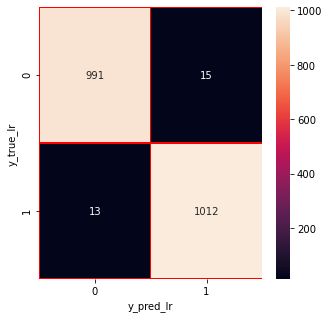

In [99]:
# Plot confusion matrix for logistic regression 
from sklearn.metrics import confusion_matrix
y_pred_lr = lr.predict(x_test)
y_true_lr = y_test
cm = confusion_matrix(y_true_lr, y_pred_lr)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_lr")
plt.ylabel("y_true_lr")
plt.show()

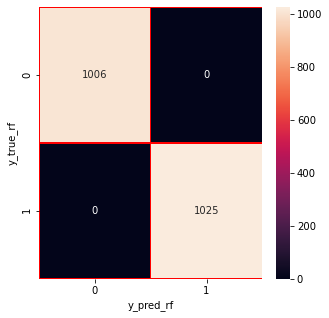

In [100]:
# Plot confusion matrix for randomforest
y_pred_rf = rf.predict(x_test)
y_true_rf = y_test
cm = confusion_matrix(y_true_rf, y_pred_rf)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_rf")
plt.ylabel("y_true_rf")
plt.show()

# Conclusion

With confusion matrix we saw that our train and test datas balanced, so there is no problem in there.

Most of classfication methods hit 100% accuracy with this dataset